> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No-Show Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The data contains medical appointments records of patients in Brazil and it focuses on whether patients usually show up on their appointment or not. The data is made up of 110527 rows and 14 columns. Below are the columns and a brief explanation of what they mean. 

> **PatientID:** personal identification of the patient

> **AppointmentID:** Identification of each appointment

> **Gender:** Identifies the patient as either Male or Female

> **Age:** How old is the patient

> **Neighbourhood:** The patient Area of location

>**(Hipertension, Diabetes, Alcoholism, Hadncap):** These columns indicate either 1 or 0 to indicate if the patient has the disease or not (1 means yes he/she has it, 0 means he/she does not have it)

>**SMS_received:** This indicates whether patients received an sms to remind him or her about the appointment

>  **ScheduledDay:** tells us on what day the patient set up their appointment.

> **Neighborhood:** location of the hospital.

> **Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

> **No-show:** Tell us whether the patient showed up per the schedule or did not show. Yes indicates did not show up and No indicate did show up


### Question(s) for Analysis
> 1. Which particular disease patients show up more for their appointment. <br>
> 2. Does the scholarship package has an influence on the show up?
> 3. Which age group usually show up the most. Or does age affect the show up? <br>
> 4. Does SMS alert influence the show up 


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
no_show_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#checking the shape of the dataframe
print('The shape of the DataFrame is: ',no_show_df.shape)

The shape of the DataFrame is:  (110527, 14)


A quick check of the shape shows the contains 14 columns and 110527 rows 

In [5]:
#checking for null values and data types for the columns
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The info on the dataframe shows that all columns have full data and we do not have missing data. There are however some data types that needs to changed to their proper data types

In [6]:
#Checking for duplicates
no_show_df.duplicated().sum()

0

In [7]:
#Checking for number of unique values for each of the columns
no_show_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
no_show_df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

We some row with Age 

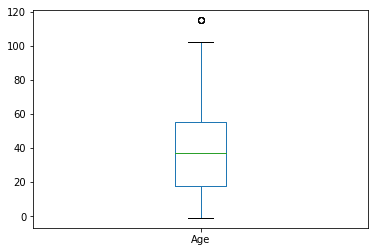

In [10]:
#Checking for outliers in the Age
no_show_df['Age'].plot(kind='box');

**Initial investigation of the shows we have 110527 record or rows, 14 columns. We also observed that we don't have missing data.We also do not have duplicates in the data. Moreso, there patients with their Age less that 0,  However, do have the following cleaning to do:**

- Formating columns and renaming No show column
- Assigning the correct data types to various columns
- Dropping records with Age less than zero
- Renaming columns that have wrong spelling


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

Converting Datatime columns (ScheduledDay, AppointmentDay) to datetime format

In [11]:
#Function to convert data types
def conv_to_date_time(df, col):
       df[col] = pd.to_datetime(df[col])
        
def conv_to_numeric(df, column, datatype):
    df[column] = df[column].astype(datatype)

In [12]:
# Converting ScheduledDay, AppointmentDay to datetime format
date_time_columns = ['ScheduledDay','AppointmentDay']
for col in date_time_columns:
    conv_to_date_time(no_show_df, col)

#### Creating an additional column to determine the day of the week

In [13]:
no_show_df['DayOfWeek'] = no_show_df['AppointmentDay'].dt.day_name()

#### Dropping Age less than zero (0)

In [14]:
no_show_df = no_show_df[~(no_show_df['Age'] <= 0)]  
no_show_df.shape

(106987, 15)

#### Correcting the names of columns with wrong spelling

In [15]:
no_show_df.rename(columns = {'Hipertension':'Hypertension',
                            'Handcap':'Handicap','No-show':'No_show'}, inplace=True)

In [16]:
#converting 'PatientId','Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received' to integer
numeric_columns = ['PatientId','Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
for item in numeric_columns:
    conv_to_numeric(no_show_df, item, 'int64')

In [17]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         106987 non-null int64
AppointmentID     106987 non-null int64
Gender            106987 non-null object
ScheduledDay      106987 non-null datetime64[ns]
AppointmentDay    106987 non-null datetime64[ns]
Age               106987 non-null int64
Neighbourhood     106987 non-null object
Scholarship       106987 non-null int64
Hypertension      106987 non-null int64
Diabetes          106987 non-null int64
Alcoholism        106987 non-null int64
Handicap          106987 non-null int64
SMS_received      106987 non-null int64
No_show           106987 non-null object
DayOfWeek         106987 non-null object
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 13.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Disease correlation with show-up)

##### Using pie chart to present the show and no-show percentages

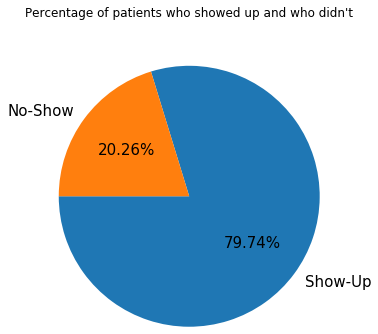

In [18]:
label_Names = ["Show-Up", "No-Show"]
data = [no_show_df.loc[(no_show_df['No_show'] == 'No')].count()[0], no_show_df.loc[(no_show_df['No_show'] == 'Yes')].count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5 ,labels = label_Names, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.3);

##### Heatmap showing the correlation for (AppointmentID,  Age, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received

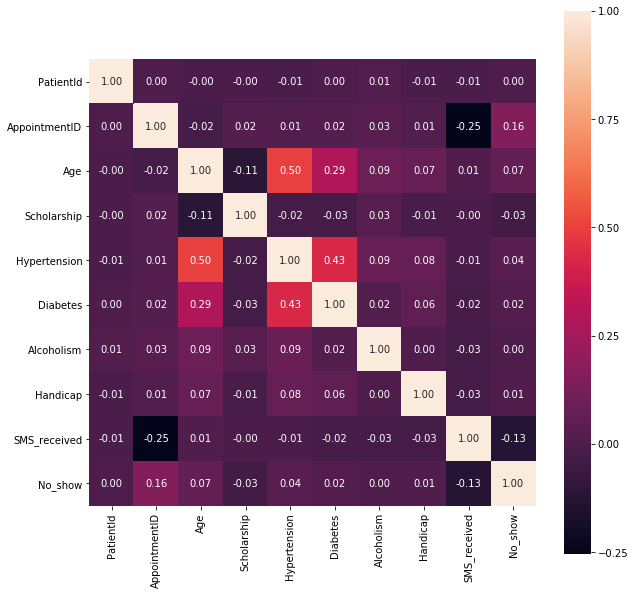

In [19]:
no_show_df['No_show'] = no_show_df['No_show'].map({'Yes': 0, 'No':1})
correlation = no_show_df.corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

### From the above heatmap, we have observed that we have strong correlation on the following variables:
- Hipertension and Age <br>
-  Hipertension and Diabetes

##### Which of the two genders show up on their appointment

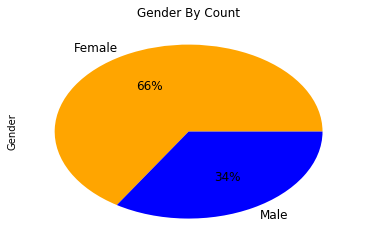

In [20]:
genderVis = round(no_show_df.Gender.value_counts()/len(no_show_df)*100)
genderVis.plot(kind = 'pie', colors = ['orange', 'blue'],autopct='%0.0f%%', labels = ['Female', 'Male'], fontsize = 12, title = 'Gender By Count')

#### From the above graph, it is clear that more Females show up for their appointments than Males. Also, People who did not receive sms show up more than those who had received sms

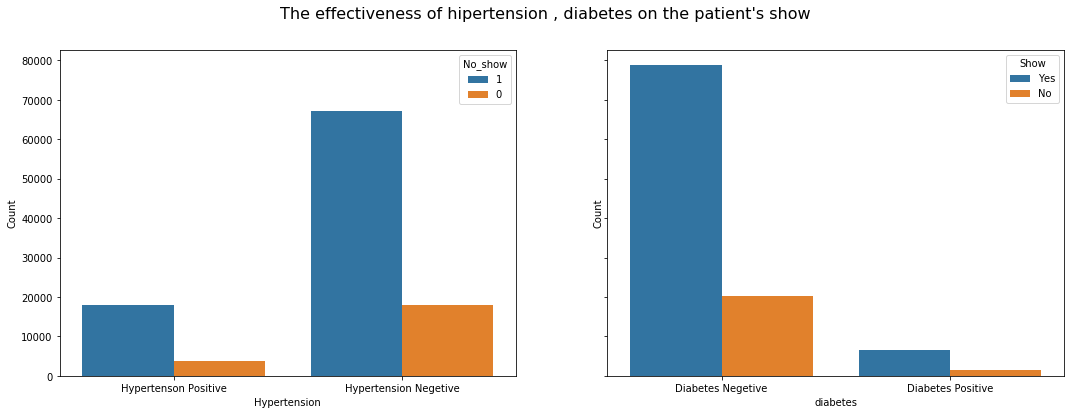

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
hue_order=[1,0]

hypertension_maping=no_show_df['Hypertension'].map({1:'Hypertenson Positive',0: 'Hypertension Negetive'})
diabetes_maping=no_show_df['Diabetes'].map({1:'Diabetes Positive',0: 'Diabetes Negetive'})


sns.countplot(x=hypertension_maping, data=no_show_df, hue= 'No_show', ax=ax1,  hue_order=hue_order)
sns.countplot(x=diabetes_maping, data=no_show_df, hue= 'No_show', ax=ax2,  hue_order=hue_order)

fig.set_figwidth(18)
fig.set_figheight(6)
fig.suptitle("The effectiveness of hipertension , diabetes on the patient's show", fontsize=16);

ax1.set(xlabel='Hypertension', ylabel='Count')
ax2.set(xlabel='diabetes', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right', title='Show',labels=['Yes', 'No']);

##### In both diagrams, it is clear that patients who are negetive in hypertension and diabetes show up more than patients who are positive in those two conditions

In [22]:
bins_labels=['childs','young-adults','middel-age-adults','old-adults']
no_show_df['age_level'] = pd.qcut(no_show_df['Age'], q=4 ,labels=bins_labels)

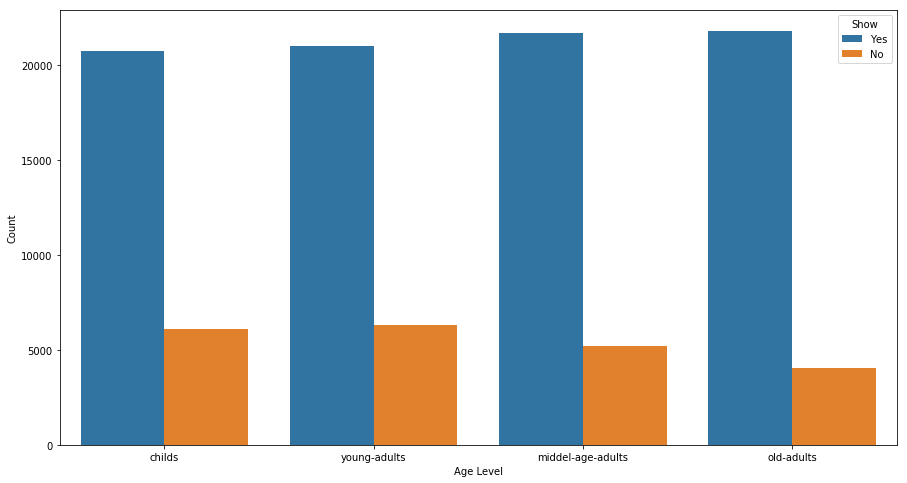

In [23]:
# Plotting to show and no_show counts of various age groups

fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='age_level', data=no_show_df, hue='No_show', hue_order=hue_order)
fig.set_figwidth(15)
fig.set_figheight(8)
ax1.set(xlabel='Age Level', ylabel='Count')
#place legend in upper left of plot
plt.legend(loc='upper right', title='Show',labels=['Yes', 'No']);

##### From the diagrams above, young-adults have low show up. Old-adult and children have more show up.

### Research Question   ( Is scholarship affect the patient's show up?)

[Text(17.2,0.5,'Count'), Text(0.5,17.2,'Scholarship')]

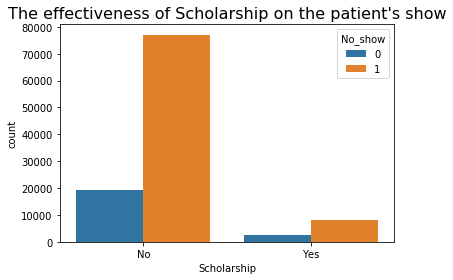

In [25]:

fig = plt.subplots(ncols=0)

scholarship_maping=no_show_df['Scholarship'].map({1:'Yes',0: 'No'})

sns.countplot(x=scholarship_maping, data=no_show_df, hue= 'No_show')

plt.title("The effectiveness of Scholarship on the patient's show", fontsize=16);
ax1.set(xlabel='Scholarship', ylabel='Count')


##### It is also clear from the above graph that patients with no scholarships show for their appointment than those with scholarship

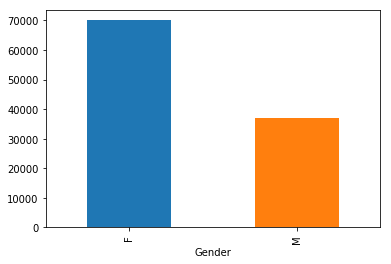

In [29]:
no_show_df.groupby('Gender')['No_show'].count().plot(kind='bar')

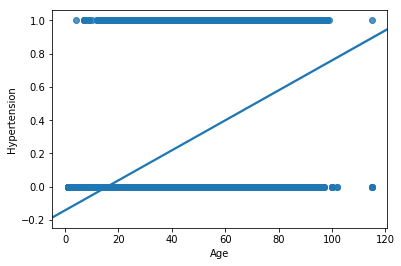

In [31]:
sns.regplot(data=no_show_df, x = 'Age', y='Hypertension')

<a id='conclusions'></a>
## Conclusions

> Analysis from the EDA step shows that:

> Patients who are negetive for either diabetes or hipertension are more show up for their appointment than those who positive for the two conditions

> Also, it was found that gender plays a role on the show since more females show up more than males. This can be concluded that females are more likely to show up for their appointment than males.

> Age also has influence on the show. From the analysis, more old age and children show up for their appointment than young adults.

> Last the scholarship package turn not have an influence on the show up since patients with scholarship package show less than those with scholarship package

## Limitation
> More data is need to be able to know which particular day amongst the days of the week do people set as their appointment and what is the show up pattern amongst the days of the week

> With regards to the data collection, there has no been any mention of how it was collected, there is question of the validity of the data

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0